# [DSL Basic Session] 220726 Visualization
발표자 : 7기 권수현

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Why Visualization?

데이터 분석 결과를 쉽게 이해할 수 있도록 시각적으로 표현하고 전달하는 과정
- 데이터를 직관적으로 이해 가능
- 데이터의 트렌드 쉽게 파악 가능
- 변수 간 관계 파악 가능
- 효율적인 커뮤니케이션

# matplotlib.pyplot vs seaborn

## matplotlib
[matplotlib](https://matplotlib.org/stable/gallery/index.html)

파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화하는 패키지

## pyplot 서브패키지
matplotlib의 서브패키지. 매트랩(matlab)이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 해줌.

## seaborn
[seaborn](http://seaborn.pydata.org/)

matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

# 사전 세팅

In [ ]:
# 코랩/아나콘다 주피터 노트북 이용시 기본적으로 설치되어 있음
# !pip install matplotlib
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 주피터 노트북 사용시 노트북 내부에 그림을 표시하도록 지정
# %matplotlib inline

# plot 소개

## 데이터셋 불러오기

In [10]:
flights = pd.read_csv('/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/flights.csv')
hotels = pd.read_csv('/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/hotels.csv')

In [7]:
# travelCode, userCode, from, to, flightType, price, time, distance, agency, date
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [8]:
# travelCode, userCode, name, place, days, price, total, date
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


## countplot
각 카테고리 값별로 데이터가 얼마나 있는지 표시

[seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot)

In [9]:
flights['flightType'].unique()

array(['firstClass', 'economic', 'premium'], dtype=object)

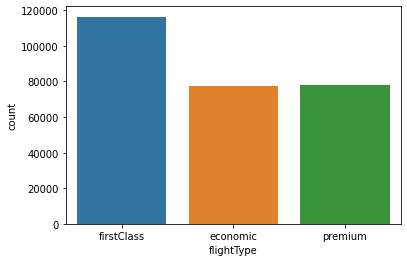

In [10]:
sns.countplot(data = flights, x = 'flightType')
plt.show()

In [11]:
flights['agency'].unique()

array(['FlyingDrops', 'CloudFy', 'Rainbow'], dtype=object)

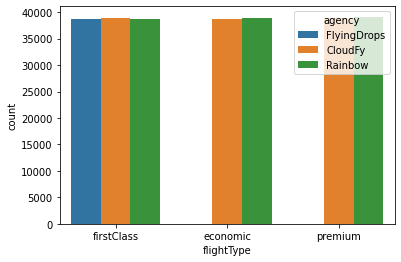

In [12]:
sns.countplot(data = flights, x = 'flightType', hue = 'agency')
plt.show()

## histogram
수치형 변수의 구간별 빈도 표현

[matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

[seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=hist#seaborn.histplot)

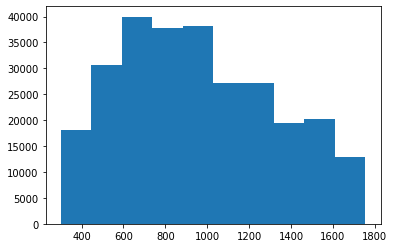

In [13]:
# matplotlib
plt.hist(flights['price'])
plt.show() #안 하면 그래프가 안 보일 수도!

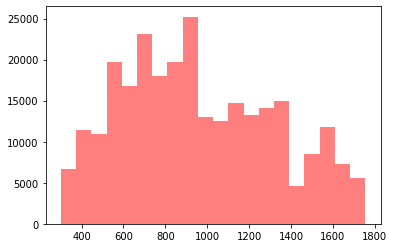

In [14]:
# matplotlib
plt.hist(flights['price'], bins = 20, color = 'red', alpha = 0.5)
plt.show()

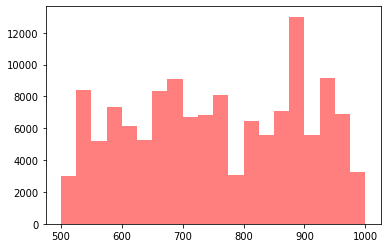

In [15]:
# matplotlib
plt.hist(flights['price'], bins = 20, color = 'red', alpha = 0.5, range = (500, 1000))
plt.show()

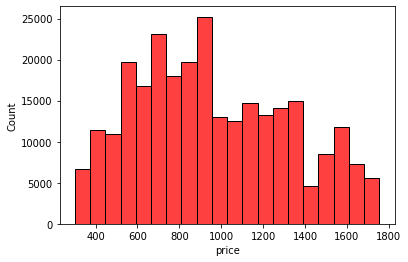

In [16]:
# seaborn
sns.histplot(data = flights, x = 'price', color = 'red', bins = 20)
plt.show()

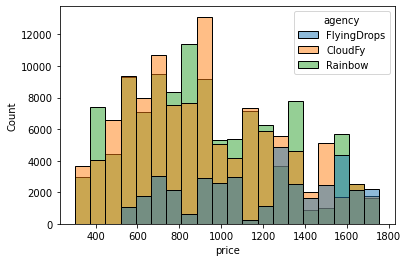

In [17]:
# seaborn
sns.histplot(data = flights, x = 'price', bins = 20, hue = 'agency')
plt.show()

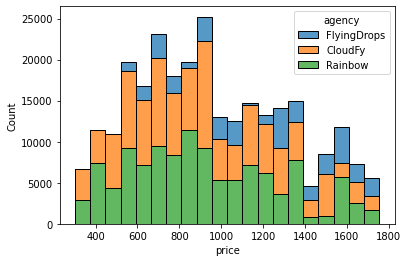

In [18]:
# seaborn
sns.histplot(data = flights, x = 'price', bins = 20, hue = 'agency', multiple = 'stack')
plt.show()

In [19]:
hotels['days'].unique()

array([4, 2, 3, 1])

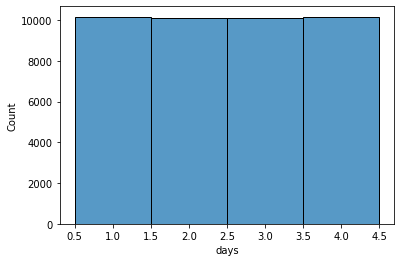

In [20]:
# seaborn
sns.histplot(data = hotels, x = 'days', discrete = True)
plt.show()

## barchart
각 카테고리 값별로 대표하는 수치형 데이터 표현

[matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar)

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)

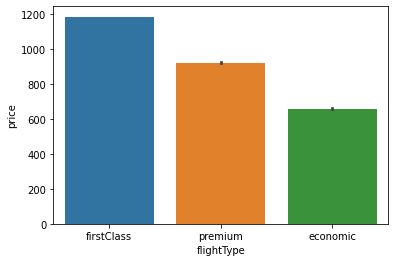

In [21]:
# seaborn
sns.barplot(data = flights, x = 'flightType', y = 'price', order = ['firstClass', 'premium', 'economic'])
plt.show()

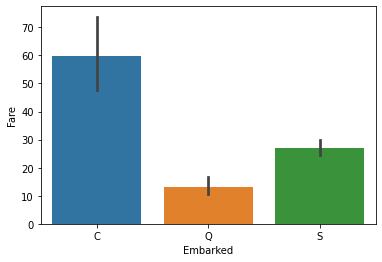

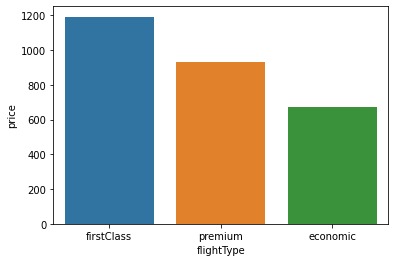

In [22]:
# seaborn
sns.barplot(data = flights, x = 'flightType', y = 'price', estimator = np.median, order = ['firstClass', 'premium', 'economic'])
plt.show()

In [23]:
# plt.bar(data = flights, x = 'flightType', height = 'price')
# plt.show()

In [11]:
print(flights['flightType'].unique())
index = np.arange(3)
print(index)
price_mean_by_flightType = flights.groupby('flightType').price.mean()
print(price_mean_by_flightType)

['firstClass' 'economic' 'premium']
[0 1 2]
flightType
economic       658.443093
firstClass    1181.067727
premium        920.392375
Name: price, dtype: float64


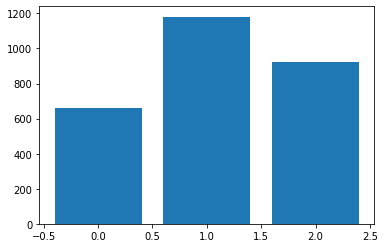

In [25]:
# matplotlib
plt.bar(x = index, height = price_mean_by_flightType)
plt.show()

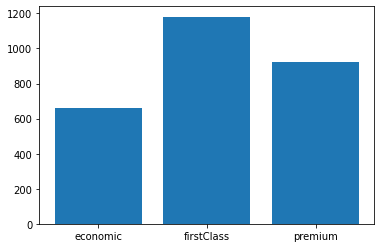

In [26]:
# matplotlib
plt.bar(x = index, height = price_mean_by_flightType)
plt.xticks(index, ['economic', 'firstClass', 'premium'])
plt.show()

## boxplot
카테고리 값별로 수치형 변수의 분포 표시
* 박스의 윗변 : 75% quartile (제3사분위수, Q3)
* 박스의 아랫변 : 25% quartile (제1사분위수, Q1)
* 박스의 중간 선 : 중앙값
* 박스 아래의 선 : 중앙값 - 1.5*IQR
* 박스 위의 선 : 중앙값 + 1.5*IQR
* IQR : Q3 - Q1
* 그 외의 점 : 아웃라이어(outlier)



[matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot)

[seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)

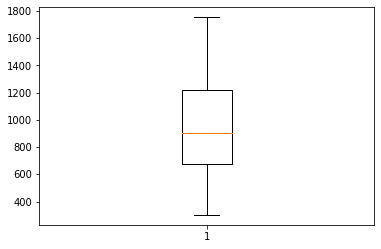

In [27]:
# matplotlib
plt.boxplot(x = flights['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


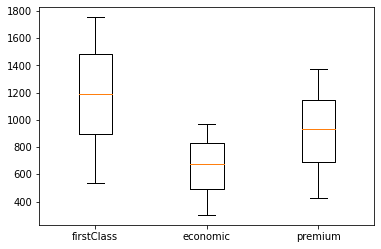

In [28]:
# matplotlib
plt.boxplot([flights[flights['flightType']=='firstClass']['price'],
           flights[flights['flightType']=='economic']['price'],
           flights[flights['flightType']=='premium']['price']],
           sym = 'b*')
plt.xticks([1, 2, 3], ['firstClass', 'economic', 'premium'])
plt.show()

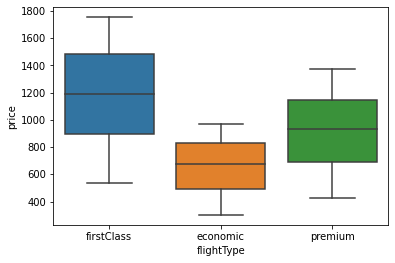

In [29]:
# seaborn
sns.boxplot(data = flights, x = 'flightType', y = 'price')
plt.show()

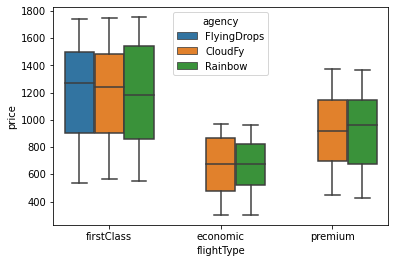

In [30]:
# seaborn
sns.boxplot(data = flights, x = 'flightType', y = 'price', hue = 'agency')
plt.show()

## piechart
전체에 대한 각 부분의 비율 표시

[matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html?highlight=pie#matplotlib.pyplot.pie)

In [31]:
ag_count = flights['agency'].value_counts()
print(ag_count)

Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: agency, dtype: int64


In [32]:
sizes = [ag_count[0], ag_count[1], ag_count[2]]
labels = ['Rainbow', 'CloudFy', 'FlyingDrops']
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explodes = (0.1, 0, 0) # 첫 번째 조각에 대해서 0.1만큼의 간격 부여. 0은 간격 없음. default = 0.

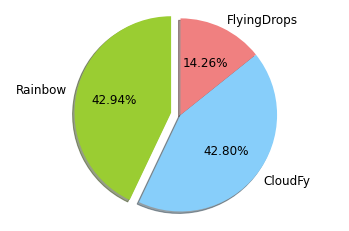

In [33]:
plt.pie(sizes,
        labels = labels,
        colors = colors,
        explode = explodes, # 각 조각 간의 간격 지정
        autopct = "%1.2f%%", # 우리가 부여한 숫자(sizes)를 알아서 퍼센트로 변환. 그 퍼센트의 소숫점 자릿수를 지정.
        shadow = True,
        startangle = 90, # 시작 각도
        textprops = {'fontsize':12})
plt.axis('equal')
plt.show()

## scatter plot
두 개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용

[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter)

[seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatter#seaborn.scatterplot)

In [34]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


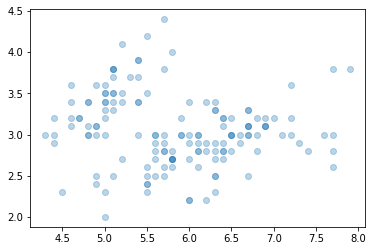

In [35]:
# matplotlib
plt.scatter(iris['sepal_length'],iris['sepal_width'], alpha = 0.3)
plt.show()

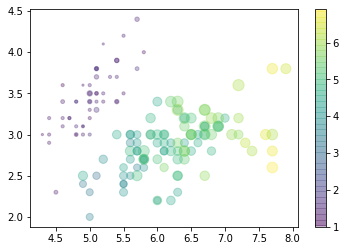

In [36]:
# matplotlib
plt.scatter(iris['sepal_length'],iris['sepal_width'], alpha = 0.3, cmap = 'viridis', c = iris['petal_length'], s = iris['petal_width']*50)
plt.colorbar()
plt.show()

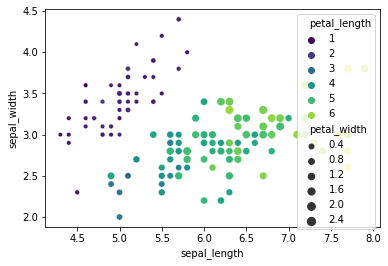

In [37]:
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'petal_length', size = 'petal_width', palette = 'viridis')
plt.show()

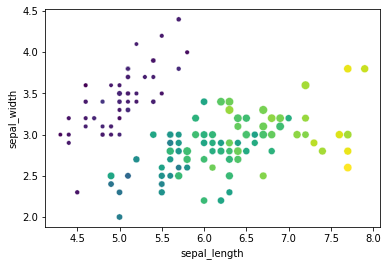

In [38]:
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'petal_length', size = 'petal_width', palette = 'viridis', legend = False)
plt.show()

## line plot/point plot
특정 데이터를 x, y로 표시하여 관계를 확인할 때 사용, 수치형 지표들 간의 경향/시계열 데이터를 파악할 때 많이 사용

[matplot.pyplot.plt](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html?highlight=pyplot%20plot#matplotlib.pyplot.plot)

[seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=line#seaborn.lineplot)

In [17]:
np.random.seed(726)

index_date = pd.date_range(start = '2022-07-26',
                      periods = 200,
                      freq = 'D',
                      name = 'date')

data = np.random.randn(200, 4).cumsum(axis=0)

df = pd.DataFrame(data, index_date, ['a', 'b', 'c', 'd'])

df.head()

,a,b,c,d
date,,,,
2022-07-26,-0.161583,0.111398,0.191079,-0.250841
2022-07-27,0.653225,-0.502861,0.021313,-2.146418
2022-07-28,1.876639,1.322712,1.214343,-1.353501
2022-07-29,1.856420,1.572975,0.469602,-1.290896
2022-07-30,2.140427,1.173068,1.163610,-1.350902


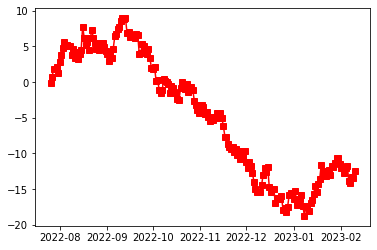

In [40]:
# matplotlib
plt.plot(df.index, df.a, marker = 's', color = 'red')
plt.show()

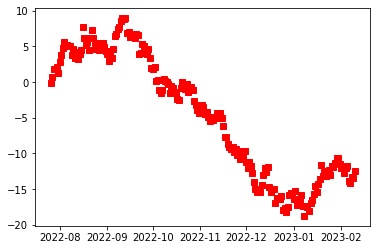

In [41]:
# matplotlib
plt.plot(df.index, df.a, marker = 's', color = 'red', ls = "")
plt.show()

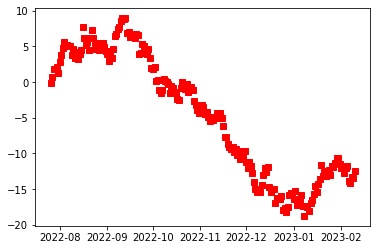

In [42]:
# matplotlib
plt.plot(df.index, df.a, 'rs') # 색상 - 마커(marker) - 선 스타일
plt.show()

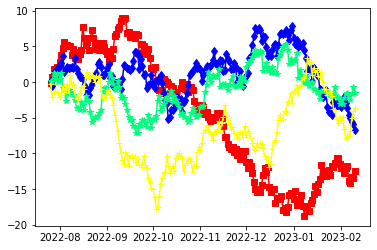

In [43]:
# matplotlib
plt.plot(df.index, df.a, marker = 's', color = 'red')
plt.plot(df.index, df.b, marker = 'd', color = 'blue')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen')
plt.plot(df.index, df.d, marker = '+', color = 'yellow')
plt.show()

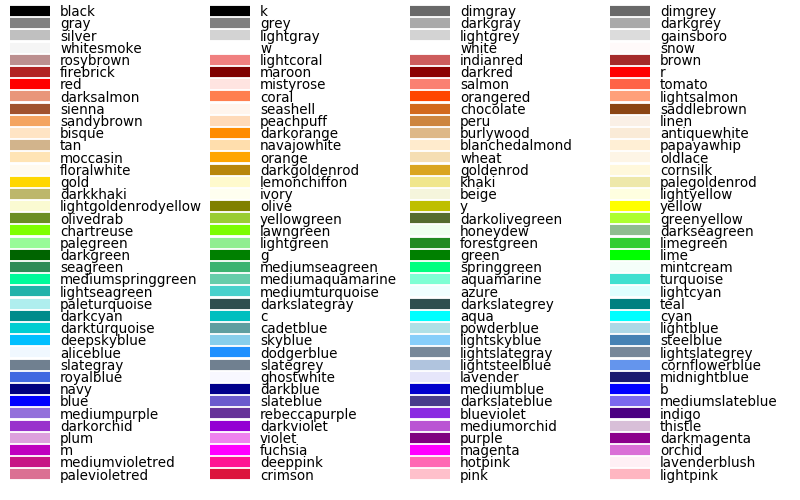

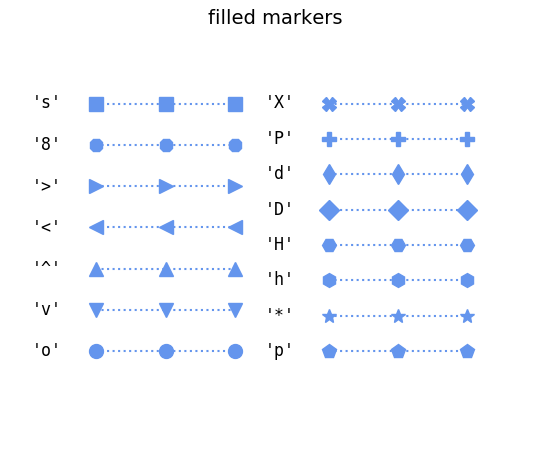

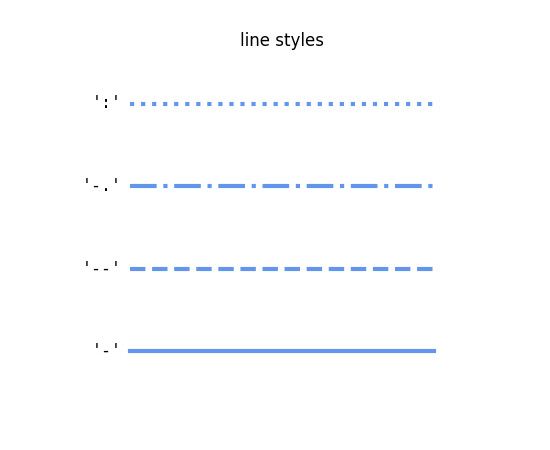

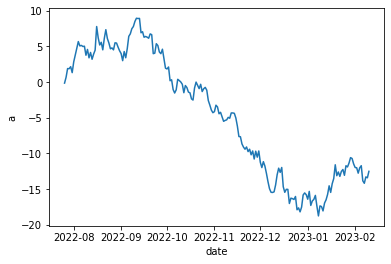

In [44]:
# seaborn
sns.lineplot(data = df, x = df.index, y = 'a')
plt.show()

## heatmap
x축과 y축에 해당하는 2개의 범주형 자료의 계급(class)별로 연속형 자료를 집계한 자료를 표시. 집계한 값에 비례하여 색깔을 다르게 하여 시각화.

[matplotlib.pyplot.pcolor](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html?highlight=pcolor#matplotlib.pyplot.pcolor)

[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)

In [45]:
sns_flights = sns.load_dataset('flights')
sns_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [46]:
sns_flights = sns_flights.pivot('month', 'year', 'passengers')
sns_flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


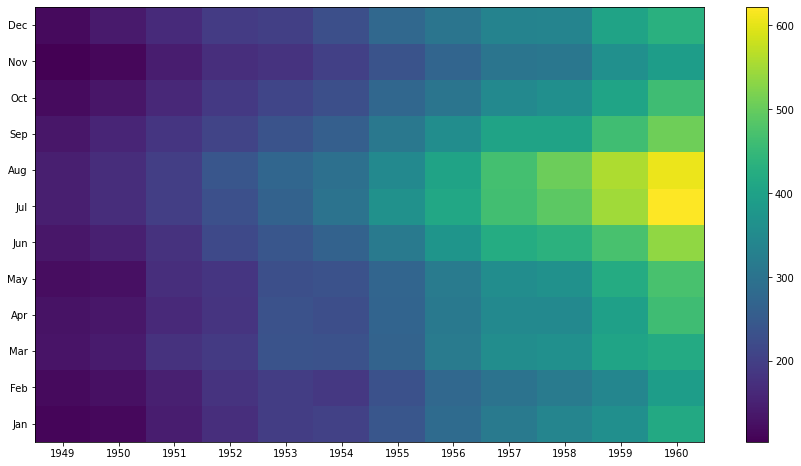

In [47]:
# matplotlib
plt.figure(figsize = (15, 8))
plt.pcolor(sns_flights)
plt.xticks(np.arange(0.5, len(sns_flights.columns), 1), sns_flights.columns)
plt.yticks(np.arange(0.5, len(sns_flights.index), 1), sns_flights.index)
plt.colorbar()
plt.show()

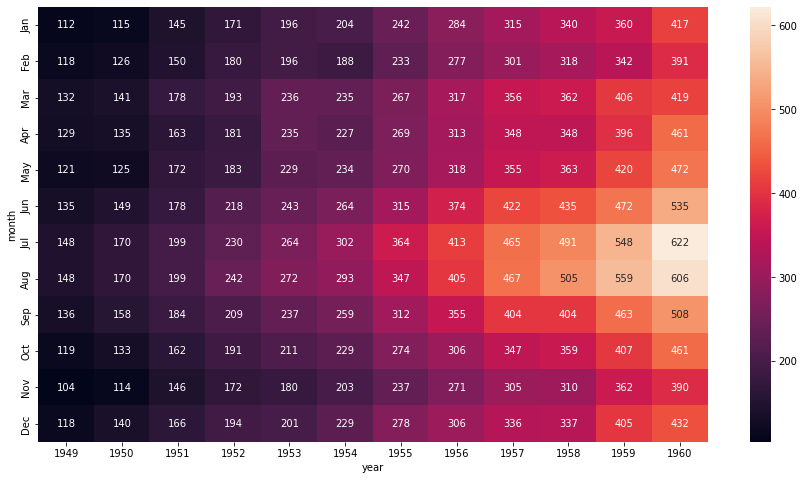

In [50]:
# seaborn
plt.figure(figsize = (15, 8))
sns.heatmap(sns_flights, annot=True, fmt = 'd')
plt.show()

이 외에도 많은 plot이 있으니 아래 링크를 참고해주시기 바랍니다.

[matplotlib](https://datascienceschool.net/01%20python/05.02%20%EB%A7%B7%ED%94%8C%EB%A1%AF%EB%A6%AC%EB%B8%8C%EC%9D%98%20%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80%20%ED%94%8C%EB%A1%AF.html)

[seaborn](https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)

# 그래프를 꾸며봅시다

## 크기/제목/축

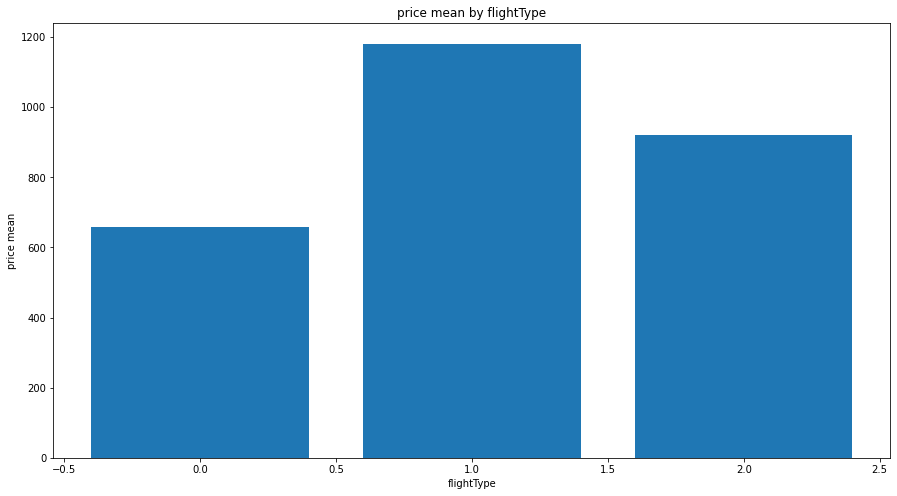

In [51]:
plt.figure(figsize = (15, 8)) # 사이즈 설정
plt.bar(x = index, height = price_mean_by_flightType)
plt.title("price mean by flightType") # 제목 설정
plt.xlabel("flightType") # x축 라벨 설정
plt.ylabel("price mean") # y축 라벨 설정
plt.show()

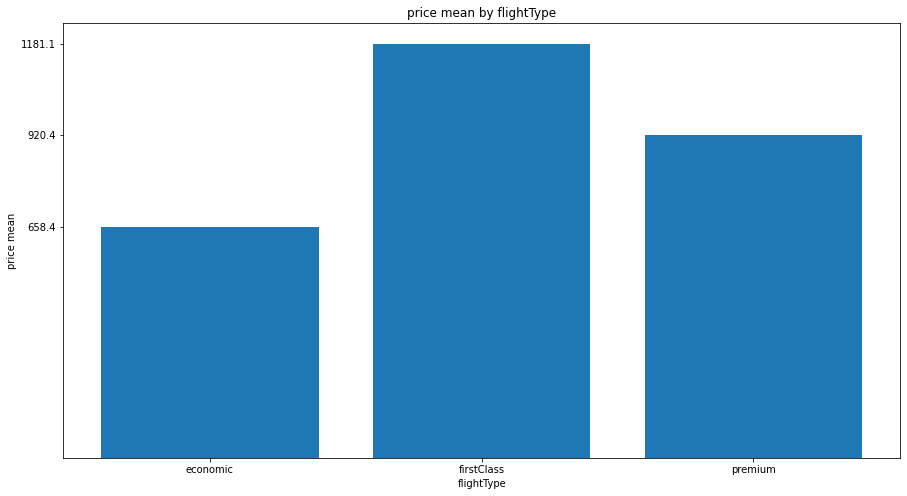

In [52]:
plt.figure(figsize = (15, 8))
plt.bar(x = index, height = price_mean_by_flightType)
plt.title("price mean by flightType")
plt.xlabel("flightType")
plt.ylabel("price mean")
plt.xticks(index, ['economic', 'firstClass', 'premium']) # x축 눈금 설정
plt.yticks(price_mean_by_flightType) # y축 눈금 설정. 데이터 값 직접 표현.
plt.show()

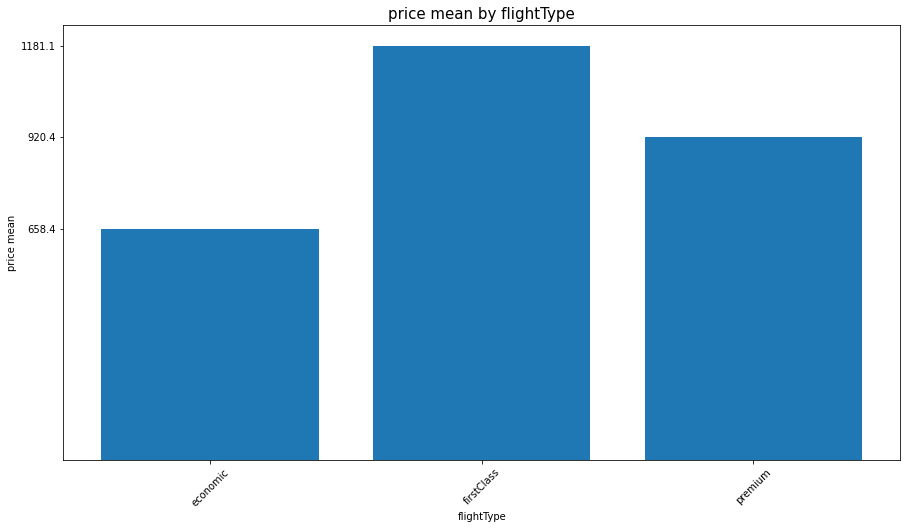

In [53]:
plt.figure(figsize = (15, 8))
plt.bar(x = index, height = price_mean_by_flightType)
plt.title("price mean by flightType", fontsize = 15)
plt.xlabel("flightType")
plt.ylabel("price mean")
plt.xticks(index, ['economic', 'firstClass', 'premium'], rotation = 45, fontsize = 10) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
plt.yticks(price_mean_by_flightType) # y축 눈금 설정. 데이터 값 직접 표현.
plt.show()

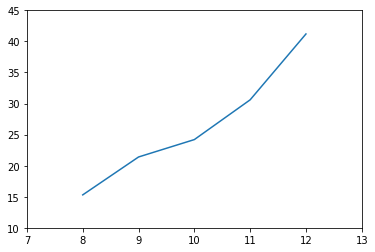

In [54]:
x = [8, 9, 10, 11, 12]
y = [15.3, 21.4, 24.2, 30.6, 41.2]
plt.plot(x, y)
plt.axis([7, 13, 10, 45]) # [xmin, xmax, ymin, ymax]
plt.show()

### tick_params
- axis는 설정이 적용될 축을 지정. {'x', 'y', 'both'} 중 선택
- direction을 'in', 'out'으로 설정하면 눈금이 안/밖으로 표시. {'in', 'out', 'inout'} 중 선택
- length는 눈금의 길이를 지정
- labelsize는 레이블의 크기를 지정
- labelcolor는 레이블의 색상을 지정
- width는 눈금의 너비를 지정
- color는 눈금의 색상을 지정

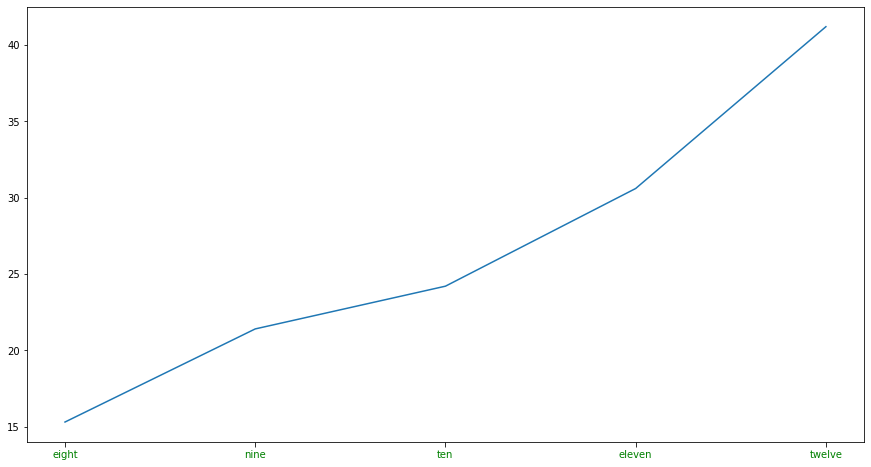

In [55]:
x = [8, 9, 10, 11, 12]
y = [15.3, 21.4, 24.2, 30.6, 41.2]
plt.figure(figsize = (15, 8))
plt.plot(x, y)
plt.xticks(x, ['eight', 'nine', 'ten', 'eleven', 'twelve'])
plt.tick_params(axis = 'x', direction = 'out', length = 5, pad = 3, labelsize = 10, labelcolor = 'green')
plt.show()

## 범례

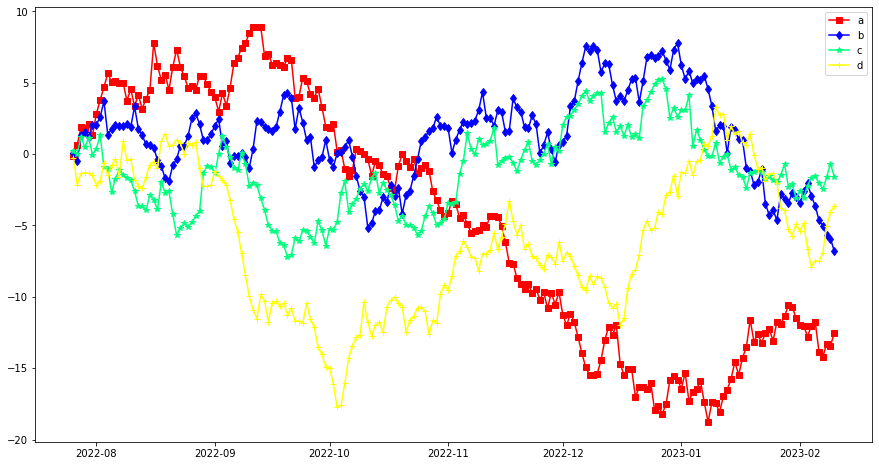

In [56]:
plt.figure(figsize = (15, 8))
plt.plot(df.index, df.a, marker = 's', color = 'red')
plt.plot(df.index, df.b, marker = 'd', color = 'blue')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen')
plt.plot(df.index, df.d, marker = '+', color = 'yellow')
plt.legend(df.columns)
plt.show()

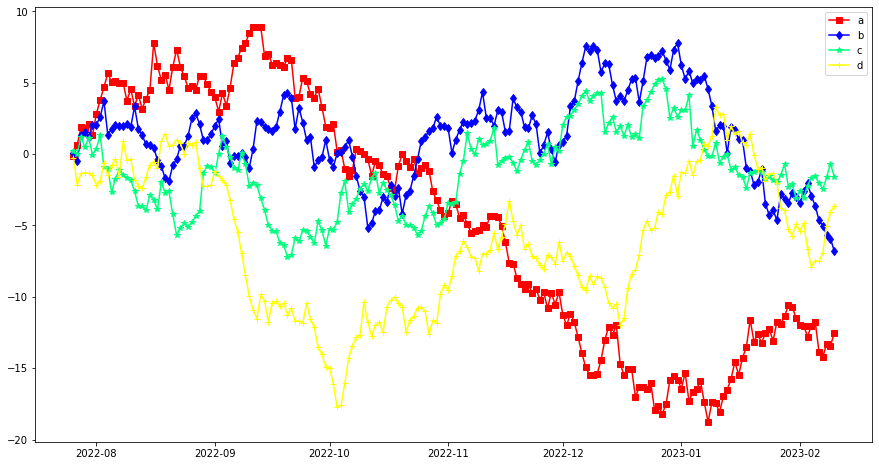

In [57]:
plt.figure(figsize = (15, 8))
plt.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
plt.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
plt.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')
plt.legend()
plt.show()

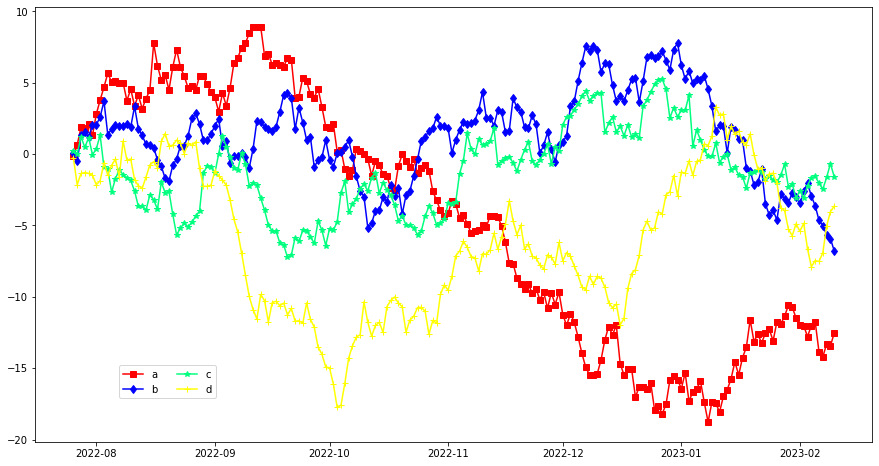

In [58]:
plt.figure(figsize = (15, 8))
plt.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
plt.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
plt.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')
plt.legend(loc = (0.1, 0.1), ncol = 2)
# loc : x, y축 각각의 길이를 1이라고 했을 때 위치로 직접 지정. loc = 'lower left' / loc = 3
# ncol : 범례에 표시될 텍스트의 열의 개수 지정
plt.show()

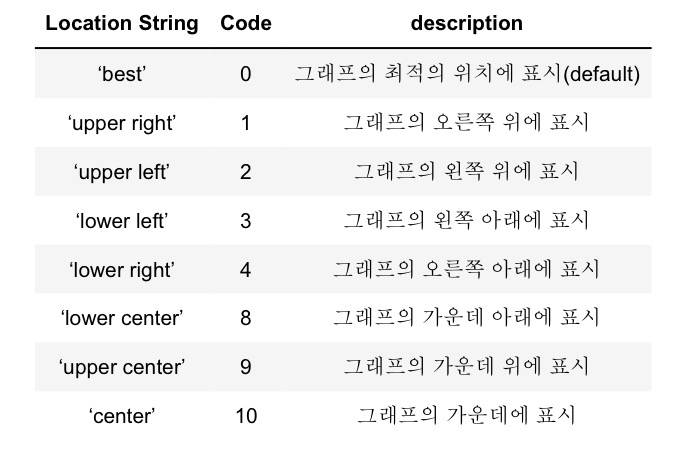

## rcparams
배경 설정

In [15]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

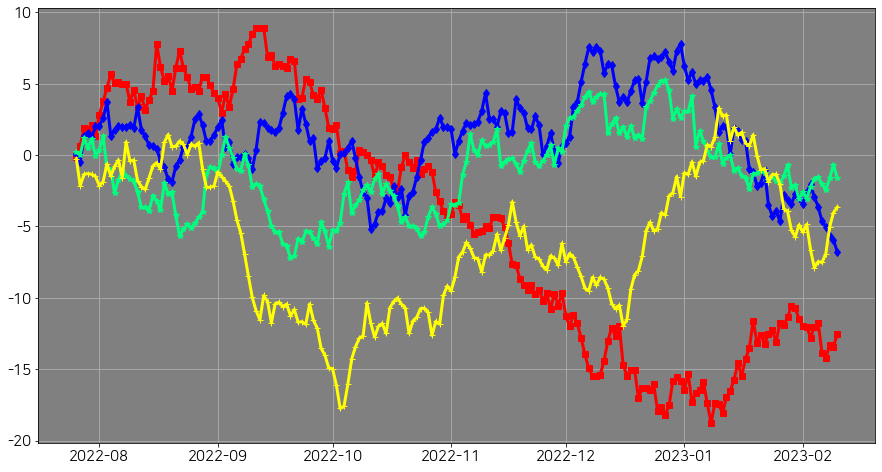

In [18]:
plt.rcParams['figure.figsize'] = (15, 8) # 그림 크기
plt.rcParams['lines.linewidth'] = 3 # 선 굵기
plt.rcParams['axes.facecolor'] = 'gray' # 배경 색상
plt.rcParams['axes.grid'] = True # 격자 유무
plt.rcParams['font.size'] = 15 # 폰트 크기

plt.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
plt.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
plt.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
plt.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')
plt.show()

## figure와 subplot

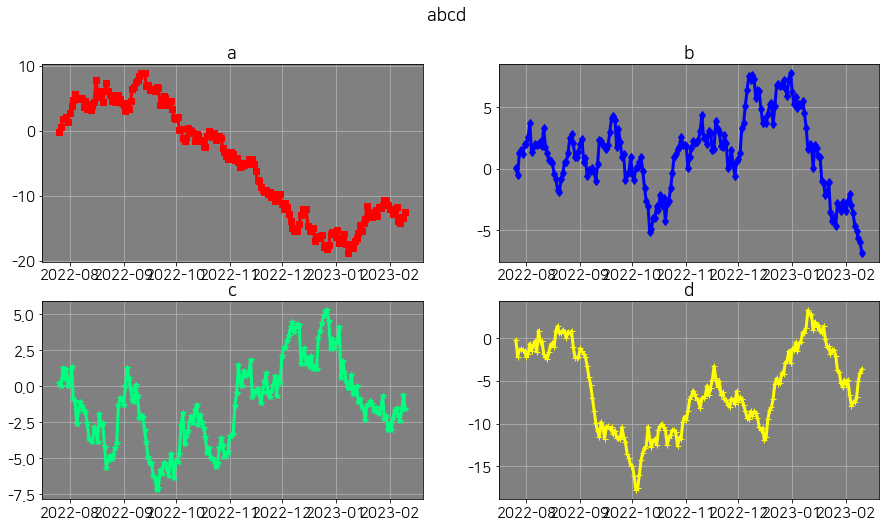

In [19]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8)) # 2x2
axes[0,0].plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
axes[0,1].plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
axes[1,0].plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
axes[1,1].plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')

fig.suptitle('abcd')
axes[0,0].set_title('a')
axes[0,1].set_title('b')
axes[1,0].set_title('c')
axes[1,1].set_title('d')
plt.show()

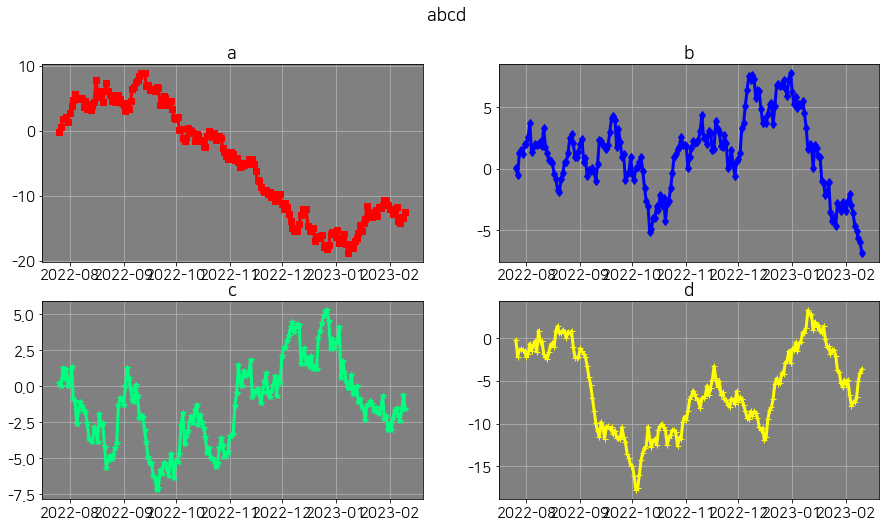

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8)) # 2x2

df_col = ['a', 'b', 'c', 'd']
markers = ['s', 'd', '*', '+']
colors = ['red', 'blue', 'springgreen', 'yellow']

for i, ax in enumerate(axes.reshape(-1)):
  ax.plot(df.index, df[df_col[i]], marker = markers[i], color = colors[i])
  ax.set_title(df_col[i])

fig.suptitle('abcd')
plt.savefig('/content/drive/MyDrive/plot저장1.pdf') # 그림 저장. plt.show() 전에 수행.
plt.show()

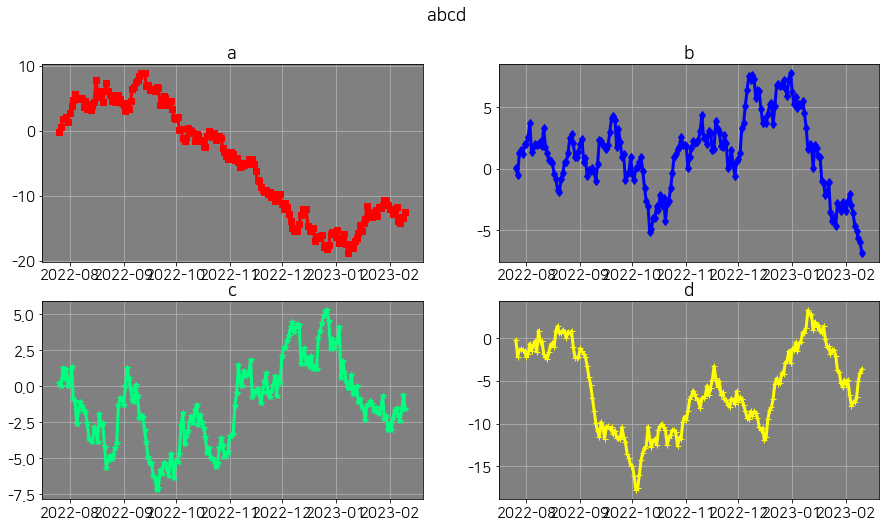

In [21]:
# figure()를 이용해 fig라는 이름의 새로운 그림(figure) 생성
fig = plt.figure()

# fig를 2x2로 4등분하고 개별 subplot 할당
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 각각의 subplot에 그림 그리기
ax1.plot(df.index, df.a, marker = 's', color = 'red', label = 'a')
ax2.plot(df.index, df.b, marker = 'd', color = 'blue', label = 'b')
ax3.plot(df.index, df.c, marker = '*', color = 'springgreen', label = 'c')
ax4.plot(df.index, df.d, marker = '+', color = 'yellow', label = 'd')

fig.suptitle('abcd')
ax1.set_title('a')
ax2.set_title('b')
ax3.set_title('c')
ax4.set_title('d')
plt.show()

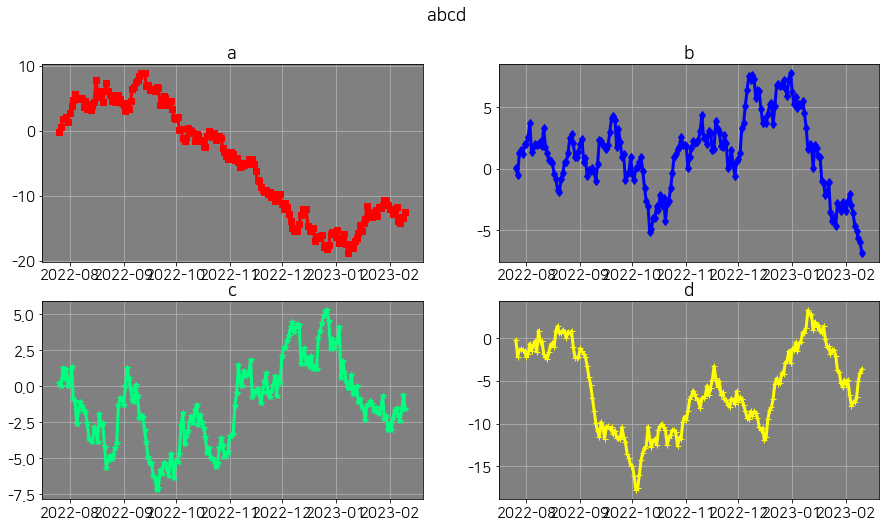

In [22]:
fig

In [ ]:
fig.savefig('/content/drive/MyDrive/plot저장2.pdf')

## 폰트 설정

In [3]:
import matplotlib.font_manager as fm

In [61]:
# 설치된 폰트 확인
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) # 나눔 폰트 없음.

sys_font number : 17
['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truety

In [62]:
# 나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
# 폰트가 정상적으로 설치됨.
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 48
nanum_font number : 31


In [64]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truet

In [65]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴 알아보기
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [6]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf' # 원하는 폰트의 경로 가져오기
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family = font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False # 그래프의 x, y축에 정상적인 - 표시 설정

# 런타임 다시 시작!

NanumSquare


In [7]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴 알아보기.
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


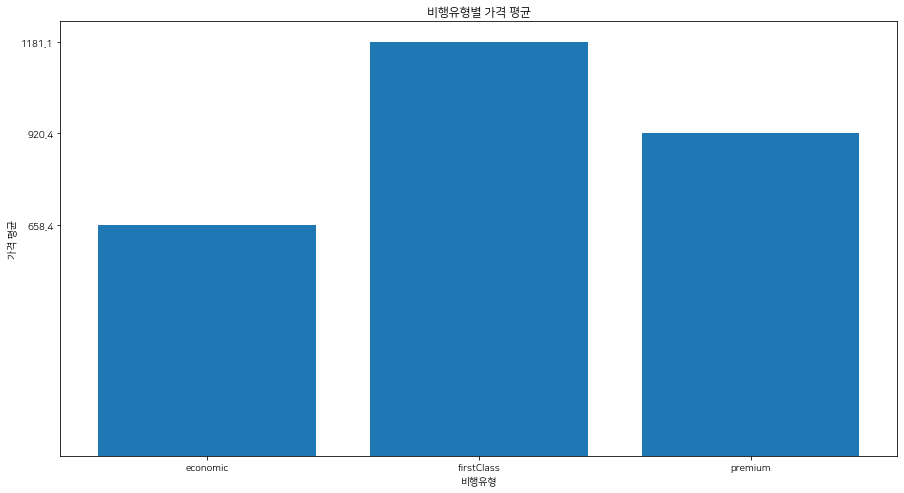

In [12]:
plt.figure(figsize = (15, 8))
plt.bar(x = index, height = price_mean_by_flightType)
plt.title("비행유형별 가격 평균")
plt.xlabel("비행유형")
plt.ylabel("가격 평균")
plt.xticks(index, ['economic', 'firstClass', 'premium']) # x축 눈금 설정
plt.yticks(price_mean_by_flightType) # y축 눈금 설정. 데이터 값 직접 표현.
plt.show()

## 팔레트
[[seaborn] color 팔레트 선택하기](https://hleecaster.com/python-seaborn-color/)

[Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

[seaborn.light_palette](https://seaborn.pydata.org/generated/seaborn.light_palette.html?highlight=light_palette#seaborn.light_palette)

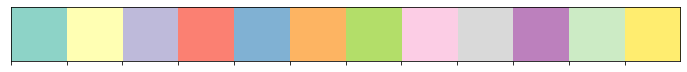

In [13]:
# 팔레트 확인하기
# 팔레트를 변수로 저장.
palette = sns.color_palette("Set3")

# palplot을 통해 저장한 팔레트를 불러온다.
sns.palplot(palette)

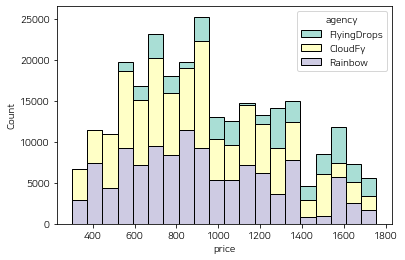

In [14]:
sns.set_palette("Set3")
sns.histplot(data = flights, x = 'price', bins = 20, hue = 'agency', multiple = 'stack')
plt.show()

# Geographic Visualization

In [69]:
# !pip install plotly_express
import plotly.express as px

In [70]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

import urllib.request, json 
with urllib.request.urlopen(geo_json) as url:
    state_geo = json.loads(url.read().decode()) # json의 형태로 표현. json은 딕셔너리가 여러 개 겹친 것.

In [71]:
state_info = pd.read_csv('/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/report.txt', delimiter='\t').iloc[3:,:]
state_info['인구'] = state_info['인구'].apply(lambda x: int(''.join(x.split(','))))

In [72]:
state_geo

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792330152, 37.55814280369575],
      [127.18350810324185, 37.550053002101485],
      [127.1852644795464, 37.54888592026534],
      [127.18480906237207, 37.545296888806796],
      [12

In [73]:
state_info.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
3,2021.1/4,종로구,"74,113",156567,"75,772","80,795","147,296","71,644","75,652","9,271","4,128","5,143",1.99,"27,781"
4,2021.1/4,중구,"63,746",133708,"65,312","68,396","124,552","60,851","63,701","9,156","4,461","4,695",1.95,"24,767"
5,2021.1/4,용산구,"112,881",243336,"118,120","125,216","229,013","110,181","118,832","14,323","7,939","6,384",2.03,"39,575"
6,2021.1/4,성동구,"135,883",298421,"145,358","153,063","291,906","142,506","149,400","6,515","2,852","3,663",2.15,"45,968"
7,2021.1/4,광진구,"166,638",356191,"171,131","185,060","343,392","165,747","177,645","12,799","5,384","7,415",2.06,"50,370"


In [74]:
fig = px.choropleth_mapbox(state_info,
                           geojson=state_geo,
                           locations='자치구',
                           color='인구',
                           color_continuous_scale='bupu', featureidkey = 'properties.name',
                           mapbox_style='carto-positron',
                           zoom=9,
                           center = {"lat": 37.563383, "lon": 126.996039}, #각각 위도, 경도
                           opacity=0.5
                          )

fig

# Word cloud

## 텍스트 데이터 전처리
[텍스트 전처리 (Text Preprocessing)](https://wikidocs.net/21694)

In [23]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import re
import konlpy

In [25]:
with open(r'/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/news.txt', encoding='utf-8') as f:
    text = f.readlines()

In [26]:
text

['대출금리도 2.72% 사상최저\n',
 '\n',
 '\n',
 '\n',
 '\t\t\t\t은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다.\n',
 '\n',
 "한국은행이 31일 발표한 '6월 중 금융기관 가중평균금리'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 '1%대' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다.\n",
 '\n',
 '대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다.\n',
 '\n',
 '신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다.\n',
 '\n',
 '한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다.\n',
 '\n',
 "시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억

### 1) Text Cleaning
- list comprehension을 이용해 빈 줄과 문장 양 끝단의 공백 제거
- 텍스트 전처리를 위해 다시 하나의 string으로 묶기

[정규 표현식 (Regular Expression)](https://wikidocs.net/21703)

In [27]:
text_strip = list([i.strip() for i in text if i != '\n'])
text_join = ' '.join(text_strip)

In [28]:
text_join

'대출금리도 2.72% 사상최저 은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다. 한국은행이 31일 발표한 \'6월 중 금융기관 가중평균금리\'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 \'1%대\' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다. 대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다. 신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다. 한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다. 시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다. 역대 6월 최대 증가 폭이다. 더 늦기 전에 집이나 주식을 사자는 \'패닉 바잉\' 수요가 가계대출 증가의 주범이라는 해석이 나온다.

In [29]:
# 특수문자 제거
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)

print(filtered_content)

대출금리도 2 72  사상최저 은행 예금에 사상 첫  0 대 금리  시대가 열렸다  1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다  은행 예 적금이 돈을 불리는 수단이 아닌  있는 돈을 그저 안전하게 보관하는  금고 에 그치는 시대가 된 셈이다  이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다   이러니 주식 부동산으로 돈이 안 쏠릴 수 없다 는 말이 나온다  한국은행이 31일 발표한  6월 중 금융기관 가중평균금리 에 따르면  지난달 은행 예금 금리는 0 88 로 전월 대비 0 19 포인트 내렸다  역대 처음으로  1 대  금리가 깨진 것이다  은행권의 정기예금 상품 67 1 는 금리 수준이 0 대였다  코로나 사태 이후 한은이 기준금리를 사상 최저인 0 5 까지 끌어내리면서  예금 금리 역시 덩달아 내려간 것이다  대출 금리도 일제히 역대 최저 수준으로 떨어졌다  은행권의 대출 금리는 평균 2 72 로 역대 최저로 집계됐다  가계 대출 금리는 2 67 였다  신용대출 3 33 2 93    주택담보대출 2 52 2 49   모두 내렸다  특히 신용대출 금리는 전월 대비 0 4 포인트나 떨어졌다  신용대출 금리가 2 대로 내려온 건 이번이 처음이다  신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다  한은 관계자는  6 17 부동산 대책을 전후로 주택 매매 전세 거래가 증가했는데  주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편 이라며  신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다 고 설명했다  시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다  한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다  역대 6월 최대 증가 폭이다  더 늦기 전에 집이나 주식을 사자는  패닉 바잉  수요가 가계대출 증가의 주범이라는 해석이 나온다  워낙 금리가 낮기 

### 2) 형태소 분석기 사용

In [30]:
komoran = konlpy.tag.Komoran()
komoran_pos = komoran.pos(filtered_content)
print(komoran_pos)

[('대출금', 'NNG'), ('리도', 'NNP'), ('2', 'SN'), ('72', 'SN'), ('사상', 'NNG'), ('최저', 'NNG'), ('은행', 'NNG'), ('예금', 'NNG'), ('에', 'JKB'), ('사상', 'NNG'), ('첫', 'MM'), ('0', 'SN'), ('대', 'NNB'), ('금리', 'NNG'), ('시대', 'NNG'), ('가', 'JKS'), ('열리', 'VV'), ('었', 'EP'), ('다', 'EC'), ('1', 'SN'), ('억', 'NR'), ('원', 'NNB'), ('을', 'JKO'), ('은행', 'NNG'), ('에', 'JKB'), ('예금', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('보', 'VX'), ('았', 'EP'), ('자', 'EC'), ('연간', 'NNG'), ('100', 'SN'), ('만원', 'NNP'), ('받', 'VV'), ('기', 'ETN'), ('도', 'JX'), ('어렵', 'VA'), ('다는', 'ETM'), ('얘기', 'NNG'), ('다', 'JX'), ('은행', 'NNG'), ('예', 'NNG'), ('적금', 'NNP'), ('이', 'JKS'), ('돈', 'NNG'), ('을', 'JKO'), ('불리', 'VV'), ('는', 'ETM'), ('수단', 'NNG'), ('이', 'JKS'), ('아니', 'VCN'), ('ㄴ', 'ETM'), ('있', 'VV'), ('는', 'ETM'), ('돈', 'NNG'), ('을', 'JKO'), ('그저', 'MAG'), ('안전', 'NNG'), ('하', 'XSV'), ('게', 'EC'), ('보관', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('금고', 'NNP'), ('에', 'JKB'), ('그치', 'VV'), ('는', 'ETM'), ('시대', 'NNG'), ('가', 'JKS'), ('되', 'VV

In [31]:
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [32]:
komoran.morphs(filtered_content)

['대출금',
 '리도',
 '2',
 '72',
 '사상',
 '최저',
 '은행',
 '예금',
 '에',
 '사상',
 '첫',
 '0',
 '대',
 '금리',
 '시대',
 '가',
 '열리',
 '었',
 '다',
 '1',
 '억',
 '원',
 '을',
 '은행',
 '에',
 '예금',
 '하',
 '아',
 '보',
 '았',
 '자',
 '연간',
 '100',
 '만원',
 '받',
 '기',
 '도',
 '어렵',
 '다는',
 '얘기',
 '다',
 '은행',
 '예',
 '적금',
 '이',
 '돈',
 '을',
 '불리',
 '는',
 '수단',
 '이',
 '아니',
 'ㄴ',
 '있',
 '는',
 '돈',
 '을',
 '그저',
 '안전',
 '하',
 '게',
 '보관',
 '하',
 '는',
 '금고',
 '에',
 '그치',
 '는',
 '시대',
 '가',
 '되',
 'ㄴ',
 '셈',
 '이',
 '다',
 '이',
 '와',
 '더불',
 '어',
 '대출',
 '금리',
 '는',
 '역대',
 '최저',
 '기록',
 '을',
 '갈',
 '아',
 '치우',
 '었',
 '다',
 '이렇',
 '니',
 '주식',
 '부동산',
 '으로',
 '돈',
 '이',
 '안',
 '쏠리',
 'ㄹ',
 '수',
 '없',
 '다',
 '늘',
 'ㄴ',
 '말',
 '이',
 '나오',
 'ㄴ다',
 '한국은행',
 '이',
 '31',
 '일',
 '발표',
 '하',
 'ㄴ',
 '6월',
 '중',
 '금융',
 '기관',
 '가중',
 '평균',
 '금리',
 '에',
 '따르',
 '면',
 '지난달',
 '은행',
 '예금',
 '금리',
 '는',
 '0',
 '88',
 '로',
 '전월',
 '대비',
 '0',
 '19',
 '포인트',
 '내리',
 '었',
 '다',
 '역대',
 '처음',
 '으로',
 '1',
 '대',
 '금리',
 '가',
 '깨지',
 'ㄴ',
 '것',
 '이',


In [33]:
# komoran은 명사만 따로 볼 수 있는 함수를 제공.
# okt는 명사 단어만 추출하는 알고리즘을 짜줘야 함.
print(komoran.nouns(filtered_content))
komoran_nouns = komoran.nouns(filtered_content)

['대출금', '리도', '사상', '최저', '은행', '예금', '사상', '대', '금리', '시대', '원', '은행', '예금', '연간', '만원', '얘기', '은행', '예', '적금', '돈', '수단', '돈', '안전', '보관', '금고', '시대', '셈', '대출', '금리', '역대', '최저', '기록', '주식', '부동산', '돈', '수', '말', '한국은행', '일', '발표', '6월', '중', '금융', '기관', '가중', '평균', '금리', '지난달', '은행', '예금', '금리', '로', '전월', '대비', '포인트', '역대', '처음', '대', '금리', '것', '은행', '정기예금', '상품', '금리', '수준', '대', '코로나', '사태', '이후', '한은', '기준', '금리', '사상', '최저', '예금', '금리', '것', '대출', '금리', '역대', '최저', '수준', '은행', '대출', '금리', '평균', '로', '역대', '최저', '집계', '가계', '대출', '금리', '신용', '대출', '주택', '담보', '대출', '신용', '대출', '금리', '전월', '대비', '포인트', '신용', '대출', '금리', '대로', '건', '이번', '처음', '신용', '대출', '금리', '것', '정부', '주', '규제', '강화', '신용', '대출', '집', '사람', '때문', '한', '관계자', '부동산', '대책', '전후', '주택', '매매', '전세', '거래', '증가', '주택', '거래', '관련', '신용', '대출', '사람', '우량', '차주', '비율', '편', '신용등급', '우량', '차주', '비율', '전체', '신용', '대출', '금리', '현상', '설명', '시장', '금리', '가계', '대출', '속도', '한은', '6월', '은행', '가계', '대출', '전월', '대비', '원', '증가', '

### 3) 불용어 제거

In [35]:
# 불용어 처리 / 한 글자 처리
stop_words = ['이오', '에다', '하오', '마오']
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:
        while word in komoran_nouns:
            komoran_nouns.remove(word)

In [36]:
print(len(komoran_nouns))
print(len(set(komoran_nouns)))
print(komoran_nouns)

189
97
['대출금', '리도', '사상', '최저', '은행', '예금', '사상', '금리', '시대', '은행', '예금', '연간', '만원', '얘기', '은행', '적금', '수단', '안전', '보관', '금고', '시대', '대출', '금리', '역대', '최저', '기록', '주식', '부동산', '한국은행', '발표', '6월', '금융', '기관', '가중', '평균', '금리', '지난달', '은행', '예금', '금리', '전월', '대비', '포인트', '역대', '처음', '금리', '은행', '정기예금', '상품', '금리', '수준', '코로나', '사태', '이후', '한은', '기준', '금리', '사상', '최저', '예금', '금리', '대출', '금리', '역대', '최저', '수준', '은행', '대출', '금리', '평균', '역대', '최저', '집계', '가계', '대출', '금리', '신용', '대출', '주택', '담보', '대출', '신용', '대출', '금리', '전월', '대비', '포인트', '신용', '대출', '금리', '대로', '이번', '처음', '신용', '대출', '금리', '정부', '규제', '강화', '신용', '대출', '사람', '때문', '관계자', '부동산', '대책', '전후', '주택', '매매', '전세', '거래', '증가', '주택', '거래', '관련', '신용', '대출', '사람', '우량', '차주', '비율', '신용등급', '우량', '차주', '비율', '전체', '신용', '대출', '금리', '현상', '설명', '시장', '금리', '가계', '대출', '속도', '한은', '6월', '은행', '가계', '대출', '전월', '대비', '증가', '역대', '6월', '최대', '증가', '늦기 전에', '주식', '사자', '패닉', '수요', '가계', '대출', '증가', '주범', '해석', '금리', '때문', '투자', '얘기', '주식

In [ ]:
def tokenizer(text):
    nouns = komoran.nouns(text)
    go_words = [noun for noun in nouns if noun not in stop_words]
    return [go_word for go_word in go_words if len(go_word)>1]

In [ ]:
tokenizer(filtered_content)

## 워드 클라우드 생성

In [37]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 빈도 분석

In [39]:
from collections import Counter
c = Counter(komoran_nouns)
print(c['사상']) #dictionary처럼 특정 단어가 몇 번 등장하는지 볼 수도 있고
print(c) #전체를 다 프린트 해서 볼 수도 있음. 빈도수가 많은 것 순서로 나타남.

4
Counter({'금리': 17, '대출': 15, '은행': 7, '신용': 7, '최저': 5, '역대': 5, '사상': 4, '예금': 4, '평균': 4, '가계': 4, '증가': 4, '주식': 3, '6월': 3, '전월': 3, '대비': 3, '주택': 3, '시대': 2, '얘기': 2, '기록': 2, '부동산': 2, '포인트': 2, '처음': 2, '수준': 2, '한은': 2, '기준': 2, '사람': 2, '때문': 2, '거래': 2, '우량': 2, '차주': 2, '비율': 2, '투자': 2, '예탁금': 2, '대출금': 1, '리도': 1, '연간': 1, '만원': 1, '적금': 1, '수단': 1, '안전': 1, '보관': 1, '금고': 1, '한국은행': 1, '발표': 1, '금융': 1, '기관': 1, '가중': 1, '지난달': 1, '정기예금': 1, '상품': 1, '코로나': 1, '사태': 1, '이후': 1, '집계': 1, '담보': 1, '대로': 1, '이번': 1, '정부': 1, '규제': 1, '강화': 1, '관계자': 1, '대책': 1, '전후': 1, '매매': 1, '전세': 1, '관련': 1, '신용등급': 1, '전체': 1, '현상': 1, '설명': 1, '시장': 1, '속도': 1, '최대': 1, '늦기 전에': 1, '사자': 1, '패닉': 1, '수요': 1, '주범': 1, '해석': 1, '신용거래': 1, '융자': 1, '잔액': 1, '최고': 1, '경신': 1, '지난해': 1, '규모': 1, '증시': 1, '대기': 1, '자금': 1, '투자자': 1, '기후': 1, '기자': 1, '조선일보': 1, '무단': 1, '전재': 1, '배포': 1, '금지': 1})


In [40]:
frequent = c.most_common(20)

print(frequent)

[('금리', 17), ('대출', 15), ('은행', 7), ('신용', 7), ('최저', 5), ('역대', 5), ('사상', 4), ('예금', 4), ('평균', 4), ('가계', 4), ('증가', 4), ('주식', 3), ('6월', 3), ('전월', 3), ('대비', 3), ('주택', 3), ('시대', 2), ('얘기', 2), ('기록', 2), ('부동산', 2)]


In [45]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

In [42]:
# 한글 폰트를 가져와야 함.(본인 컴퓨터에서 가져오면 됨.)
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'

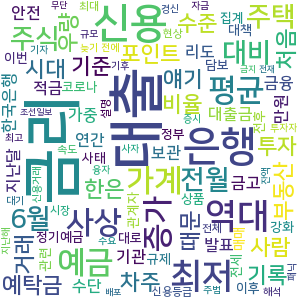

In [43]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

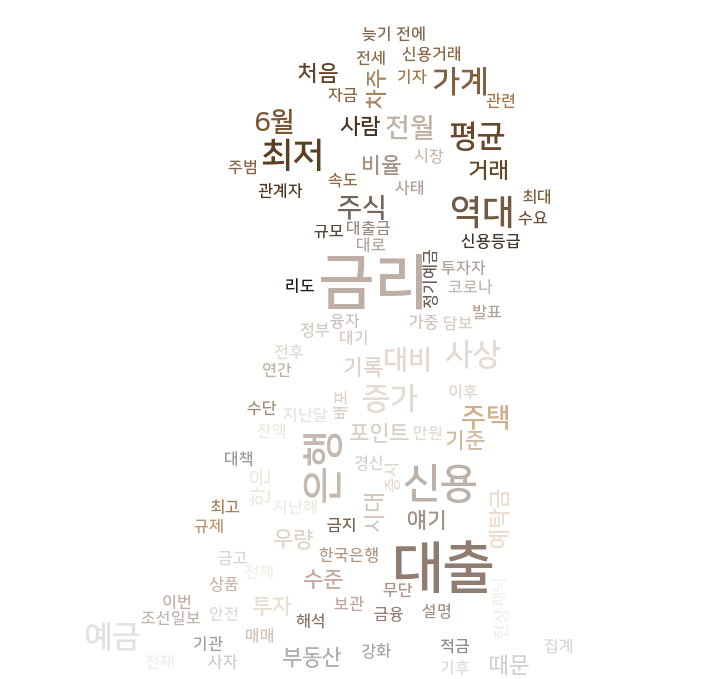

In [48]:
img = plt.imread(r'/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/dogimg.jpeg')

wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='white',
    color_func=ImageColorGenerator(img),
    mask=img)
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

# 과제 설명
각 팀의 EDA 데이터를 바탕으로 시각화해보고 인사이트 추출하기

## 예시 : 7기 EDA 프로젝트 F조

In [49]:
sleep= pd.read_csv("/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/sleep_data.csv",encoding='utf-8',index_col=0)
sleep.head()

,나이,성별,직장,수면어려움정도,워치유저,워치착용슬립,어플사용유무,어플명,어플사용이유,잠필요시기,...,어플-calm,어플-Asmr,어플-유튜브,어플-기타,연령대,이유-알람,이유-수면 모니터링,이유-수면 분석 리포트,이유-수면 유도,"이유-코골이, 이갈이 등 녹음"
0,33,남성,직장인,3,0,0,0,NO,NO,NaN,...,0,0,0,0,30대,0,0,0,0,0
1,25,여성,직장인,4,0,0,0,NO,NO,NaN,...,0,0,0,0,20대,0,0,0,0,0
2,24,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",...,0,0,0,0,20대,0,1,0,0,0
3,29,여성,직장인,8,1,0,0,NO,NO,NaN,...,0,0,0,0,20대,0,0,0,0,0
4,29,남성,직장인,8,1,1,0,NO,NO,NaN,...,0,0,0,0,20대,0,0,0,0,0


### 1) 첫 번째 분석
닥터도지는 소리로 수면을 유도하는 모노럴비트 알고리즘을 개발하여 적용했다는 점에서 다른 수면 어플과 차별점을 가진다. 그렇다면 현재 수면 유도 시장을 선점한 어플이 있을까? 수면 유도 기능을 원하는 사람들이 가장 많이 사용하는 어플을 알아보자!

#### 데이터 전처리

In [59]:
rival2=sleep[sleep['이유-수면 유도']==1]

#'어플-슬립사이클', '어플-필로우','어플-오토슬립', '어플-슬립지', '어플-슬립워치', '어플-스노어랩', '어플-슬립모니터', '어플-SaA','어플-삼성',
# '어플-워치', '어플-애플', '어플-샤오미', '어플-calm', '어플-Asmr', '어플-유튜브','어플-기타'
a1=sum(rival2['어플-슬립사이클'])
a2=sum(rival2['어플-필로우'])
a3=sum(rival2['어플-오토슬립'])
a4=sum(rival2['어플-슬립지'])
a5=sum(rival2['어플-슬립워치'])
a6=sum(rival2['어플-스노어랩'])
a7=sum(rival2['어플-슬립모니터'])
a8=sum(rival2['어플-SaA'])
a9=sum(rival2['어플-삼성'])
a10=sum(rival2['어플-워치'])
a11=sum(rival2['어플-애플'])
a12=sum(rival2['어플-샤오미'])
a13=sum(rival2['어플-calm'])
a14=sum(rival2['어플-Asmr'])
a15=sum(rival2['어플-유튜브'])
a16=sum(rival2['어플-기타'])

reason3=pd.DataFrame({
    "이유":['슬립사이클', '필로우','오토슬립', '슬립지', '슬립워치', '스노어랩', '슬립모니터', 'SaA','삼성','스마트워치', '애플', '샤오미', 'Calm', 'Asmr', '유튜브','기타'],
    "총계":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
})

#### 그래프 1

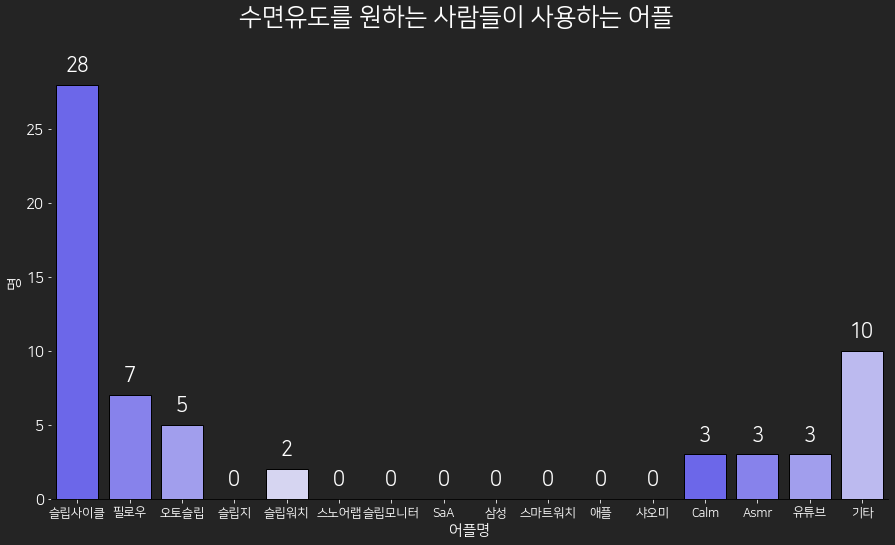

In [53]:
plt.rc('font', family = font_name)
plt.figure(figsize=(15,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="이유",y="총계",data=reason3,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플명',color='white') #x축단어설정, 흰색
plt.ylabel('명',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('수면유도를 원하는 사람들이 사용하는 어플',color='white' ,size = 25)
plt.show()

수면 유도 기능을 원하는 사람들이 가장 많이 사용하는 어플은 슬립사이클!

#### 데이터 전처리

In [54]:
a1=sum(sleep['어플-슬립사이클'])
a2=sum(sleep['어플-필로우'])
a3=sum(sleep['어플-오토슬립'])
a4=sum(sleep['어플-슬립지'])
a5=sum(sleep['어플-슬립워치'])
a6=sum(sleep['어플-스노어랩'])
a7=sum(sleep['어플-슬립모니터'])
a8=sum(sleep['어플-SaA'])
a9=sum(sleep['어플-삼성'])
a10=sum(sleep['어플-워치'])
a11=sum(sleep['어플-애플'])
a12=sum(sleep['어플-샤오미'])
a13=sum(sleep['어플-calm'])
a14=sum(sleep['어플-Asmr'])
a15=sum(sleep['어플-유튜브'])
a16=sum(sleep['어플-기타'])

reason6=pd.DataFrame({
    "이유":['슬립사이클', '필로우','오토슬립', '슬립지', '슬립워치', '스노어랩', '슬립모니터', 'SaA','삼성','스마트워치', '애플', '샤오미', 'Calm', 'Asmr', '유튜브','기타'],
    "총계":[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
})

#### 그래프 2

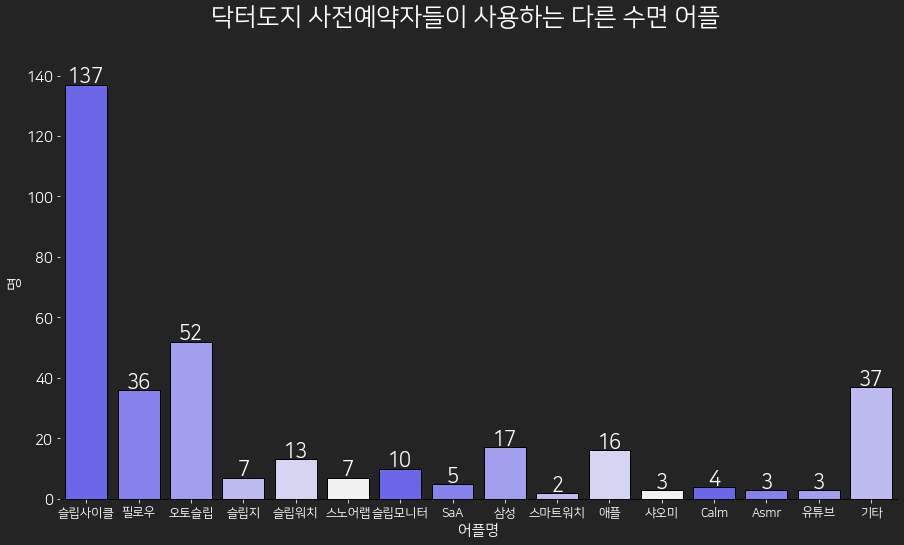

In [55]:
plt.rc('font', family = font_name)
plt.figure(figsize=(15,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="이유",y="총계",data=reason6,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
###수치달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플명',color='white') #x축단어설정, 흰색
plt.ylabel('명',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 

#제목설정
plt.suptitle('닥터도지 사전예약자들이 사용하는 다른 수면 어플',color='white' ,size = 25)
plt.show()

하지만 슬립사이클은 가장 많은 이용자를 가지고 있다.

#### 데이터 전처리

In [57]:
reason_list = []

for i in list(sleep.columns):
    if i[:3] == '이유-':
        reason_list.append(i)

app_list = []

for i in list(sleep.columns):
    if i[:3] == '어플-':
        app_list.append(i)

new_reason_list = []
for i in reason_list:
    new_reason_list.append(i[3:])

app_reason_df = pd.DataFrame({'이유':new_reason_list})

for i in app_list:
    app_reason_list = []
    for j in reason_list:
        num = sleep[sleep[i]==1][j].sum()
        app_reason_list.append(num)
    app_reason_df[i[3:]] = app_reason_list

#### 그래프 3

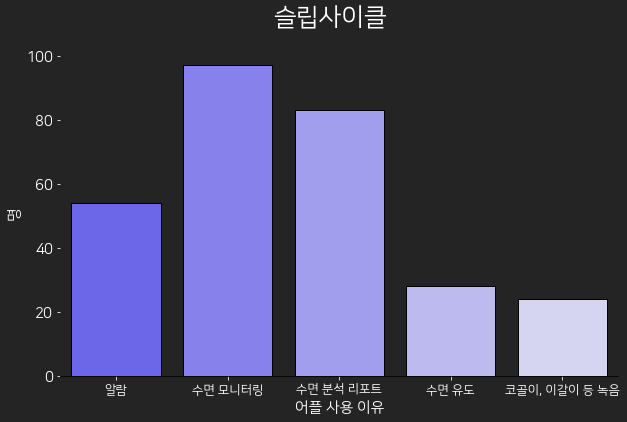

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(data = app_reason_df, x = '이유', y = '슬립사이클', palette = colors,edgecolor='black')
plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(visible=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('어플 사용 이유',color='white')
plt.ylabel('명',color='white')
plt.xticks(fontsize =12.5) 
plt.suptitle('슬립사이클',color='white' ,size = 25)
plt.show()

또한 모든 기능을 제공하고 있다.

즉, 많은 사람들이 이용하는 슬립사이클에 수면 유도 기능이 있기 때문에 수면 유도 기능을 원하는 사람들이 이 어플을 가장 많이 이용한다는 결과가 나온 것이지 수면 유도 기능을 위해 슬립사이클을 이용한 것이 아니다!

즉, 수면 유도 시장을 제대로 선점한 어플이 부재하다! 다른 수면 유도 경쟁사들의 강점과 단점을 확인하여 닥터도지의 발전 방향성을 구체화하자! => 경쟁사 리뷰 데이터 분석으로 이어지기

### 2) 두 번째 분석
수면 어플 사용 유무에 따라 수면 어려움을 해결하는 방법에 차이가 있을까?

#### 데이터 전처리

In [62]:
# 어플 사용 x
sleepp=sleep[sleep['해결법1'].notna()]
sleepp['해결법1']

sleepp=sleepp.reset_index()

#해결법1 리스트 하나에 싹다 담기!
solve1=[]
for i in range (0,len(sleepp)):
  solve1.append(sleepp['해결법1'][i])
print(solve1)

solve1 = "".join(solve1)
print(solve1)

okt = konlpy.tag.Okt()
solve1_pos = okt.pos(solve1)
print(solve1_pos)

solve1_nove = list([word for word, pos in solve1_pos if (pos=='Verb')|(pos=='Noun')])
print(solve1_nove)

stop_words = ['한다','합니다','올','하기','그냥','계속','다그','최대한','하고','일단']
unique_solve1_nove = set(solve1_nove)
for word in unique_solve1_nove:
    if word in stop_words or len(word) == 1:
        while word in solve1_nove:
            solve1_nove.remove(word)

c = Counter(solve1_nove)
print(c)

['누워서 뒤척인다', '캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭', '수면음악듣기', '일단 누워서 버텨봅니다ㅜ', '피곤하게 만든다', '잠을 자지 않는다', '눈 감고 오디오북/asmr 듣기', '눈감고있기', '유튜브를 틀어놓고 보다가 스스륵 잠들길 기도', 'ASMR틀어놓는다', '유튜브 장시간 틀어두고 잠', '무조건 눈감고있기', '잘때까지 스마트폰을 붙잡고 있는다 ', '숫자를세곤하죠', '낮잠', '누워서 잔잔한 영상보기', '맥주', '못잔적없음', '술마시기', '억지로 잘려고노력한다', '일찍 자려고 하거나 수면안대를 사용', '모닥불 ASMR ', '노래들으면서잠', '잠이들때 까지 깨어 있는다', '회사 점심시간에 쪽잠', '잠이 올때까지 기다렸다가 잠을 잔다. 일어나는 시간은 동일하개', '몸이 더 피곤해질때까지 유튜브를 틀어놓다가 한계일때 끄고 자거나 틀어놓고 보다가 잠든다', '피곤하면 에너지드링크 섭취', '기상.', 'Asmr 듣기, 잠 포기하기', '밤샘을해서 수면패턴을 맞춘다', '그냥 침대에 계속 누워있습니다', 'Asmr틀어놓기', '유튜브 틀어둠', '잠이 올 때까지 불 끄고 누워있거나 휴대폰을 함', '유튜브에서 Asmr듣기', '음악 감상', '눈을 감고 최대한 자려고 노력한다 ..', 'Asmr을 듣는다', '운동 등 몸을 최대한 피곤하게 만들어요!', '유투브에서 asmr듣기', 'Asmr 듣기', '유튜브 백색소음', '잠이 올때까지 기다린다', '수면유도 음악 틀고 자기', '유투브 수면 음악', '기다림 ', '따뜻한 물로 씻고 나와서 유튜브로 음악을 듣습니다', '자세를 바꿈', '낮잠을 잠', '인터넷 써핑', '유투브 수면음악', '음악을 듣는다.간단한 스트래칭', '강압적으로', '유튜브 영상에서 수면 유도 영상을 틀어요(요즘은 거의 매일)', '조용한 티비시청', '유튜브에서 조용한 음악 리스트를 찾아 듣는 편', '맥주2캔마시기', '계속 눈 감고 있는다', '명상

In [63]:
tot_solve=pd.DataFrame({
    "word":solve1_nove
})
tot_solve['count']=1
tot_solve=tot_solve.groupby(by=['word'],as_index=False).count()
tot_solve=tot_solve.sort_values(by='count',ascending=False).head(30)
tot_solve

,word,count
561,유튜브,115
8,감고,66
434,수면,63
519,영상,47
631,잔다,44
566,음악,39
557,유도,38
192,듣기,37
863,핸드폰,35
97,노력,35


#### 그래프 1

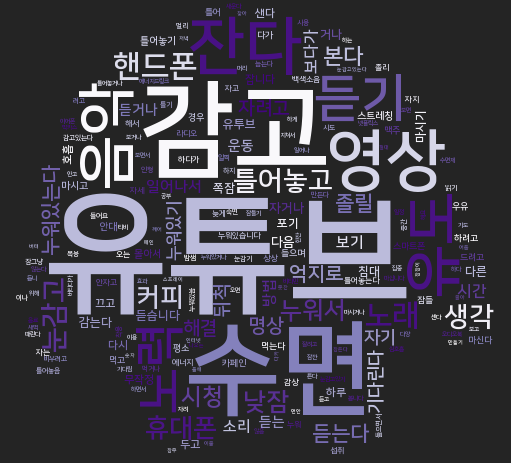

In [61]:
img = plt.imread(r'/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/dozy.jpeg')
wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="#242424",
        random_state=1,
        colormap="Purples",        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

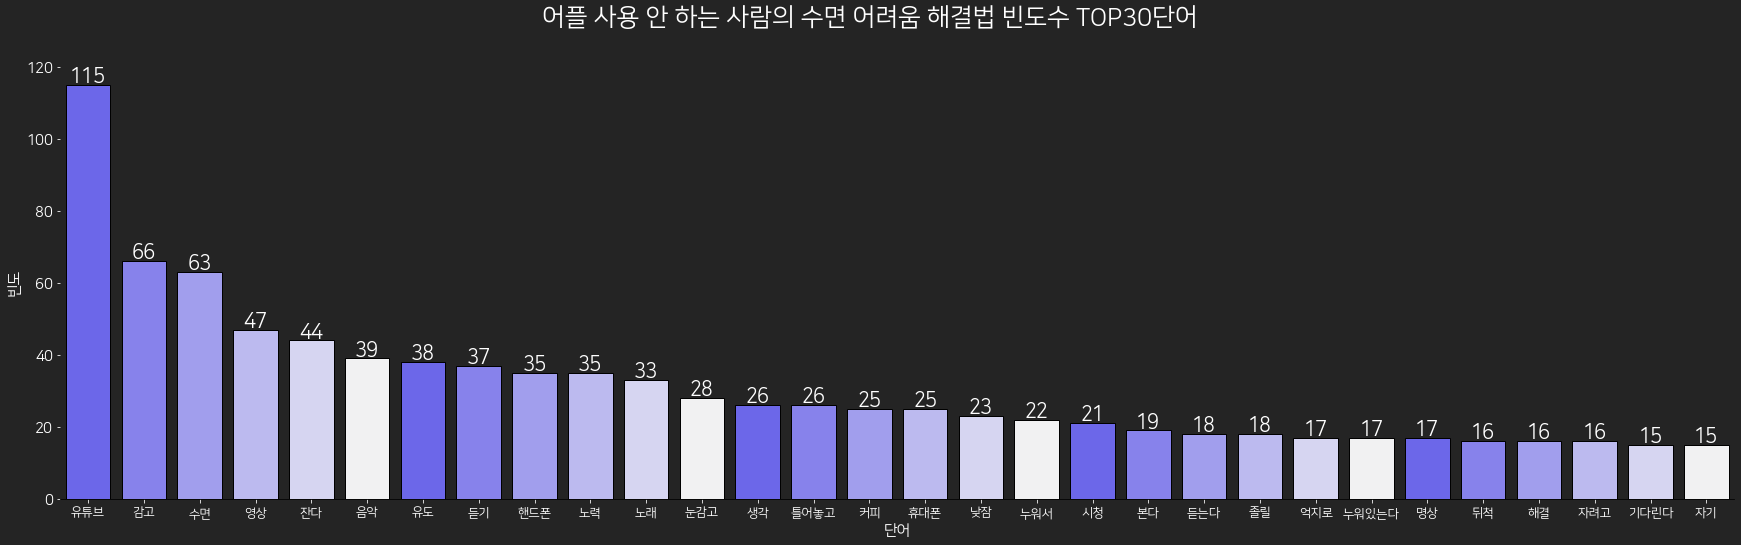

In [64]:
plt.rc('font', family = font_name)
plt.figure(figsize=(30,8))

colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="word",y="count", data=tot_solve,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
#빈도달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('단어',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 



plt.suptitle('어플 사용 안 하는 사람의 수면 어려움 해결법 빈도수 TOP30단어', size = 25,color='white')
plt.show()

#### 데이터 전처리

In [65]:
sleepp=sleep[sleep['해결법'].notna()]
sleepp['해결법']

sleepp=sleepp.reset_index()

#해결법 리스트 하나에 싹다 담기!
solve1=[]
for i in range (0,len(sleepp)):
  solve1.append(sleepp['해결법'][i])
print(solve1)

solve1 = "".join(solve1)
print(solve1)

okt = konlpy.tag.Okt()
solve1_pos = okt.pos(solve1)
print(solve1_pos)

solve1_nove = list([word for word, pos in solve1_pos if (pos=='Verb')|(pos=='Noun')])
print(solve1_nove)

stop_words = ['한다','합니다','올','하기','그냥','거나','보기','해서','보고','자는','하면','최대한','잔다','계속','다그','경우','방법','찾지','일단','하려고']
unique_solve1_nove = set(solve1_nove)
for word in unique_solve1_nove:
    if word in stop_words or len(word) == 1:
        while word in solve1_nove:
            solve1_nove.remove(word)

c = Counter(solve1_nove)
print(c)

['잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다', '호흡에 집중합니다', '잠이 올 때까지 핸드폰을 한다.', '친구와 통화나 카톡하면 편한 친구의 익숙한 목소리가 잠오게 되더라고요', '다음날 일찍잠듬', '수면제', '침대에서 아예 반대 방향으로 누워서 자거나, 졸릴 때까지 영상을 봅니다.', '핸드폰으로 가끔 노래 듣거나 파도 소라 듣기', '그냥 눈감고있는다', '이완명상을 한다', '강아지들 데리고 자요', '클래식 청취', '유도음악', '누워서 최대한 잠을 청하려 노력하는 편', '카페인 줄이기, 낮잠안자기', '뒤척거리거나 베게를 바꿔보거나 침대를 옆으로 누워보거나 이불을 바꿔본다', '하루를 제일 지치게 보낸다. ', '명상음악이나 자연소리믹싱어플, 백색소음 등등', '바디스캔명상', '술을 마십니다', '그냥 침대에 누워있음', '잠이 잘 드는 나만의 자세를 합니다. 엎드려서 왼팔에 얼굴을 묻는 자세에요 ', '아이마사지기를 하거나 온열안대를 차고잔다', '눈을 감고 있는다', '수면유도제 향초 음악 ', '3/7/8 호흡법, 안 될 때에는 아예 잠을 포기함.', '뒤척임', '포기하고 수면 후 다음 날 후회한다', '항상 피곤해서 잘 수 잇음', '오디오북 등 재생하면서 수면', '그냥 누워있는다', '정신과에서 불면증 약을 받아 먹고 있다\n마그네슘, 레시틴, 엽산 등을 챙겨먹고 있다\n잠이 올 때까지 다른 것을 한다\n수면유도제를 먹는다\n술을 먹는다\n', '따뜻한 물을 마시고 모든걸 셧다운 한다는 느낌으로 잠을 청함', '최대한 방을 어둡게한다', '해결을 못한다..ㅠ 못 자고 몸이 쇠약하면 가위 눌리고 또 스트레스 받아서 못 자고의 연속', '술한잔', '유튜브를 본다', '비타민 섭취', '이른 저녁식사, 운동, 수면유도 음악', '그래도 누워있거나 운동', '수면유도제 복용', '넷플릭스 보고 잠', '수면 어플 이용', '밤새기', 'asmr', '책 읽어주는 유투브', '자연소리 asmr', '휴일에 몰아자거나

In [67]:
tot_solve=pd.DataFrame({
    "word":solve1_nove
})
tot_solve['count']=1
tot_solve=tot_solve.groupby(by=['word'],as_index=False).count()
tot_solve=tot_solve.sort_values(by='count',ascending=False).head(30)
tot_solve

,word,count
338,유튜브,46
259,수면,44
334,유도,34
313,영상,25
341,음악,23
5,감고,15
502,핸드폰,15
109,듣기,14
460,틀어놓고,10
443,커피,10


#### 그래프 2

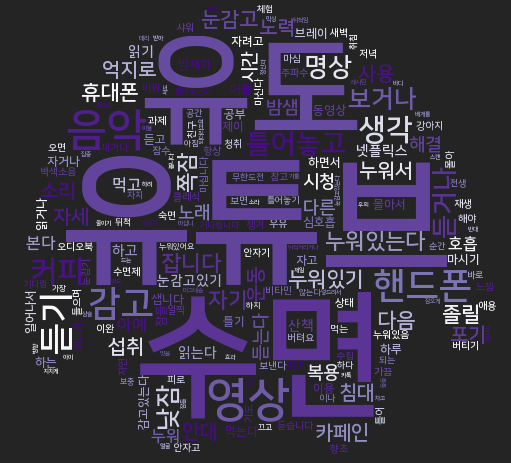

In [66]:
img = plt.imread(r'/content/drive/MyDrive/DSL/기초세션_Visualization_세션준비/dozy.jpeg')
wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="#242424",
        random_state=1,
        colormap="Purples",        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

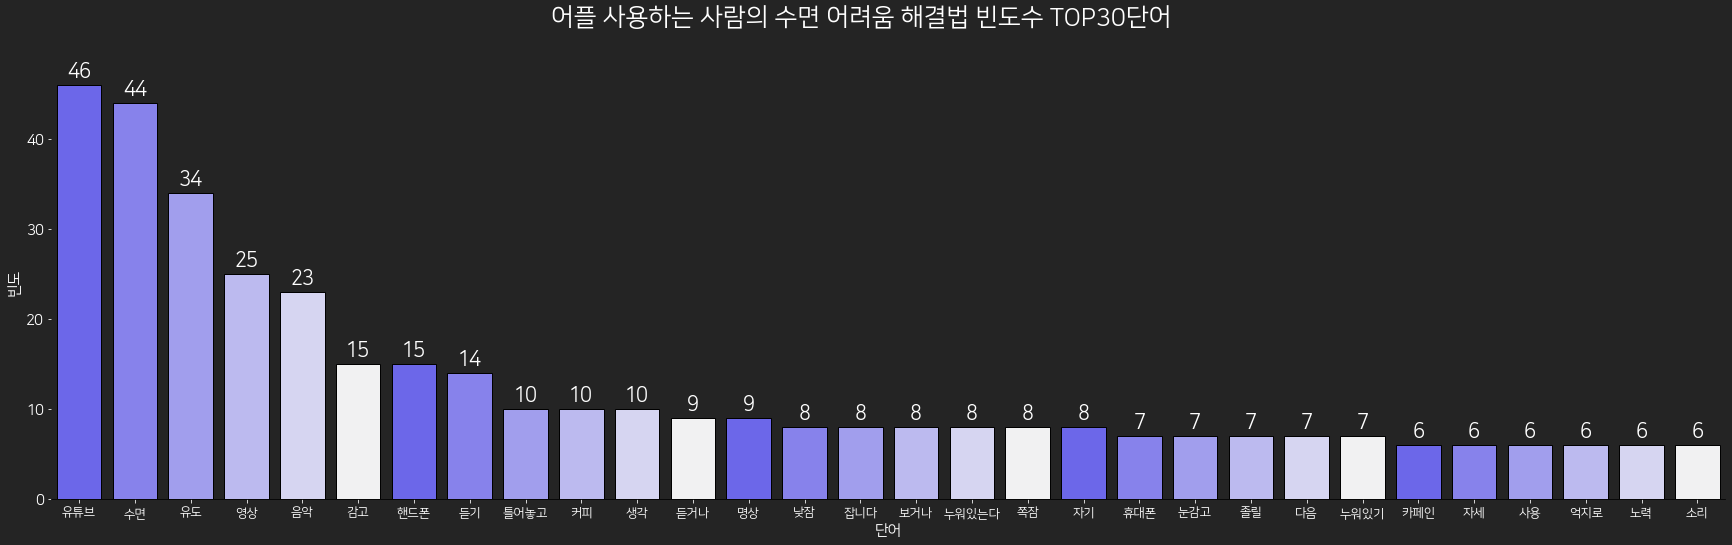

In [68]:
plt.rc('font', family = font_name)
plt.figure(figsize=(30,8))
colors = sns.light_palette("#5851FF", reverse=True) #color팔레트 구성해주기

x=sns.barplot(x="word",y="count", data=tot_solve,palette=colors,edgecolor='black')

plt.rc('figure', facecolor = '#242424')#그래프 밖 테마색
ax = plt.gca()
ax.set_facecolor('#242424')#그래프 배경색
plt.grid(b=False) #grid 아예 없앤거!
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['left'].set_visible(False) #왼쪽 테두리 제거
#빈도달아주기
for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+1), ha = 'center', size =20, color = 'white')
ax.tick_params(axis='x', colors='white') # x축 변수들 흰색
ax.tick_params(axis='y', colors='white') #y축 변수들 흰색
plt.xlabel('단어',color='white') #x축단어설정, 흰색
plt.ylabel('빈도',color='white') #x축단어설정, 흰색
plt.xticks(fontsize =12.5) 
plt.suptitle('어플 사용하는 사람의 수면 어려움 해결법 빈도수 TOP30단어', color='white',size = 25)
plt.show()

수면 어플을 사용하든 안하든 수면 어려움을 해결하기 위해 유튜브에서 수면 음악 영상을 본다는 것을 알 수 있다. 즉, 수면 유도 기능을 강조해서 유튜브 수면 음악 영상에 광고를 집행하면 효과적인 마케팅이 될 것!

# 참고자료

* 6기 김지오님의 visualization 세션
* DSL 210715 텍스트 마이닝 세션
* 한솔지 교수님의 'R과파이썬프로그래밍' 강의안
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/index.html
* https://rfriend.tistory.com/419
* https://datascienceschool.net/01%20python/05.00%205%EC%9E%A5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94.html
